# Summary Time-Series Data Exploration

In [1]:
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### LASSO Regression Implementation for one city

In [2]:
def combine_city_data(city_code, dfs, names):
    """
    Generate a single DataFrame with data from all years for one city.
    """
    data_rows = [df.loc[city_code] for df in dfs]
    all_data = pd.concat(data_rows, axis=1)
    all_data.columns = names
    all_data.index.name = 'Year'
    return all_data
    

def import_training_data(filename):
    return pd.read_csv('../data/train/%s' % filename, index_col='UACE Code', dtype={'UACE Code': str})

def import_testing_data(filename):
    return pd.read_csv('../data/test/%s' % filename, index_col='UACE Code', dtype={'UACE Code': str})

In [3]:
city_info = pd.read_csv('../data/Cities.csv', index_col='UACE Code', dtype={'UACE Code': str})
columbus_code = city_info[city_info['Primary UZA Name'] == 'Columbus, OH'].index[0]
portland_code = city_info[city_info['Primary UZA Name'] == 'Portland, OR--WA'].index[0]
pittsburgh_code = city_info[city_info['Primary UZA Name'] == 'Pittsburgh, PA'].index[0]
boston_code = city_info[city_info['Primary UZA Name'] == 'Boston, MA--NH'].index[0]
miami_code = city_info[city_info['Primary UZA Name'] == "Miami--Fort Lauderdale, FL"].index[0]


city = miami_code

ynames = ['UPT_percap']#, 'PMT_percap', 'FARES_infladj_percap']
ydfs = [import_training_data('%s.csv' % name) for name in ynames]
city_yvals = combine_city_data(city, ydfs, ynames)


In [4]:
#xnames = ['VRM_percap', 'TotalFund_infladj_percap', 'FedFund_frac', 'StateFund_frac', 'LocalFund_frac', 'OpFund_frac', 'OpExp_GA_frac', 'OpExp_VM_frac', 'OpExp_VO_frac']
xnames = ['VRH_percap', 'OpExp_GA_frac', 'OpExp_VM_frac', 'OpExp_VO_frac',  'FedFund_frac', 'StateFund_frac', 'LocalFund_frac']
xdfs = [import_training_data('%s.csv' % name) for name in xnames]
city_xvals = combine_city_data(city, xdfs, xnames)
city_xvals

,VRH_percap,OpExp_GA_frac,OpExp_VM_frac,OpExp_VO_frac,FedFund_frac,StateFund_frac,LocalFund_frac
Year,,,,,,,
1991,0.664373,0.201699,0.195570,0.514013,0.236611,0.081783,0.453872
1992,0.669192,0.150524,0.183376,0.563412,0.315612,0.106969,0.384530
1993,0.819397,0.151342,0.165327,0.590861,0.310117,0.094941,0.369039
1994,0.774301,0.151840,0.198797,0.570333,0.215449,0.127315,0.400854
1995,0.695001,0.131935,0.206390,0.577117,0.217003,0.158462,0.370716
1996,0.702590,0.126466,0.200198,0.583173,0.196482,0.137512,0.417499
1997,0.814033,0.128869,0.219148,0.560597,0.218490,0.095242,0.452029
1998,0.846750,0.122067,0.213282,0.576631,0.206612,0.093346,0.466838
1999,0.878192,0.133930,0.210897,0.561397,0.255514,0.110336,0.400219


Correlation Matrix below shows there is some multicollinearity going on. I think this explains why the lasso regression later on eliminates so many variables

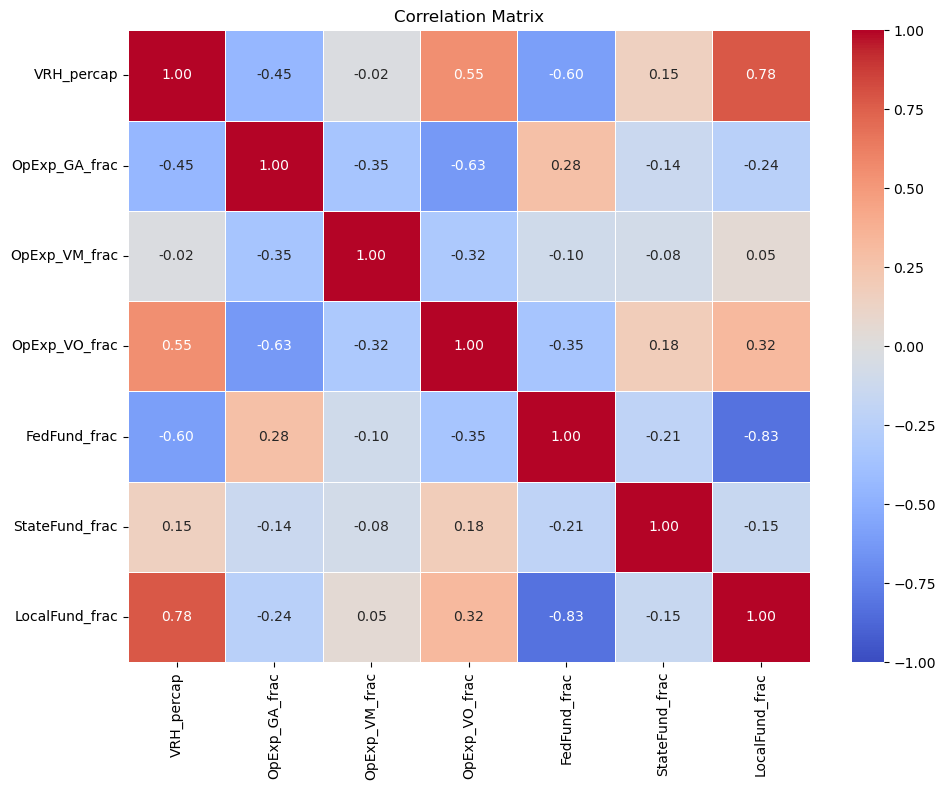

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = city_xvals.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, vmin=-1.0, annot_kws={"size": 10})
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


Lasso implementation: First scale the data then use LassoCV which autocalculates the penalty parameter using cross-validation. 

The coefficients are printed and those with zeros indicate the variables aren't too important. However they depend on the city and difficult to interperate.

In [6]:
lasso_pipe = Pipeline([
    ('scale', StandardScaler()),  
    ('lasso', LassoCV(alphas=None, cv=5, max_iter=100000))  
])


y = city_yvals.values.ravel()
X = city_xvals.values


lasso_pipe.fit(X, y)


print("The LASSO Regression coefficients are:")
print(lasso_pipe.named_steps['lasso'].coef_)


The LASSO Regression coefficients are:
[ 1.18564334  0.44450391 -0.          2.13121982 -0.         -0.27056638
  0.        ]


## All Cities 
### Find the most common features to keep

Here I decided to do all the cities and find the most common features that did not give zeros. 

It may be worth thinking about if we need to group features since they give different coefficients.

In [7]:

xnames = [ 'VRH_percap',  'TotalFund_infladj_percap', 'FedFund_frac', 'StateFund_frac', 'LocalFund_frac', 'CapFund_infladj_percap', 'OpFund_infladj_percap', 'OpFund_frac', 'OpExp_Total_infladj_percap', 'OpExp_GA_frac', 'OpExp_VM_frac', 'OpExp_VO_frac']
#xnames = ['VRM_percap', 'VRH_percap', 'VOMS_percap']
#xnames = ['TotalFund_infladj_percap', 'FedFund_frac', 'StateFund_frac', 'LocalFund_frac', 'CapFund_infladj_percap','OpFund_infladj_percap', 'OpFund_frac']
#xnames = ['OpExp_Total_infladj_percap', 'OpExp_GA_frac', 'OpExp_VM_frac', 'OpExp_VO_frac']
#xnames = ['VRH_percap', 'OpExp_GA_frac', 'OpExp_VM_frac', 'OpExp_VO_frac', 'LocalFund_frac']
#xnames = ['VRH_percap', 'OpExp_GA_frac', 'OpExp_VM_frac', 'OpExp_VO_frac', 'FedFund_frac', 'StateFund_frac', 'LocalFund_frac']
coefficients_array = np.zeros((city_info.shape[0], len(xnames)))
for idx, (index, row) in enumerate(city_info.iterrows()):
    city = index

    ynames = ['UPT_percap']#, 'PMT_percap', 'FARES_infladj_percap']
    ydfs = [import_training_data('%s.csv' % name) for name in ynames]
    city_yvals = combine_city_data(city, ydfs, ynames)

    
    xdfs = [import_training_data('%s.csv' % name) for name in xnames]
    city_xvals = combine_city_data(city, xdfs, xnames)

    lasso_pipe = Pipeline([
    ('scale', StandardScaler()),  
    ('lasso', LassoCV(alphas=None, cv=5, max_iter=100000))  
    ])


    
    y = city_yvals.values.ravel()
    X = city_xvals.values
    mask = ~np.isnan(X).any(axis=1) & ~np.isnan(y)  # filter out nans
    X = X[mask]
    y = y[mask]

    
    if len(y) > 0 and X.shape[1] == len(xnames):  # make sure they aren't empty after filtering
        splits = 5 
        if len(y) > splits-1: # can't have less samples than splits
            lasso_pipe = Pipeline([
                ('scale', StandardScaler()),  
                ('lasso', LassoCV(alphas=None, cv=splits, max_iter=100000))  
            ])

            
            lasso_pipe.fit(X, y)

            
            coefficients_array[idx, :] = lasso_pipe.named_steps['lasso'].coef_

Prints how many times a feature had a zero. Unfortuntately out of 406 cities it seems there is no clear winning parameters ...

In [8]:
zero_counts = np.sum(coefficients_array == 0, axis=0)

feature_zero_counts = dict(zip(xnames, zero_counts))

sorted_items = list(feature_zero_counts.items())

for i in range(len(sorted_items)):
    for j in range(i + 1, len(sorted_items)):
        if sorted_items[i][1] > sorted_items[j][1]:
            sorted_items[i], sorted_items[j] = sorted_items[j], sorted_items[i]


for feature, count in sorted_items:
    print(f"Feature: {feature}, Zeros: {count} of {coefficients_array.shape[0]}")

Feature: VRH_percap, Zeros: 107 of 320
Feature: OpExp_VM_frac, Zeros: 116 of 320
Feature: StateFund_frac, Zeros: 130 of 320
Feature: FedFund_frac, Zeros: 154 of 320
Feature: OpExp_VO_frac, Zeros: 154 of 320
Feature: LocalFund_frac, Zeros: 164 of 320
Feature: OpExp_GA_frac, Zeros: 182 of 320
Feature: OpFund_frac, Zeros: 187 of 320
Feature: OpExp_Total_infladj_percap, Zeros: 188 of 320
Feature: OpFund_infladj_percap, Zeros: 188 of 320
Feature: CapFund_infladj_percap, Zeros: 230 of 320
Feature: TotalFund_infladj_percap, Zeros: 239 of 320


# Predicting Ridership from Various Financial Parameters

### The Model

We implement a linear model including various statistics from the Department of Transport. The model is

$\mathrm{Ridership\;(UPT) = \beta_{1}VRH + \beta_{2}EXP_{Admin} + \beta_{3}EXP_{Operations} + \beta_{4}EXP_{Maintenance} + \beta_{5}FUND_{Federal}
                            \beta_{6}FUND_{State}+ \beta_{7}FUND_{Local} }$


The parameters are:

$\mathrm{VRH}$: Vehicle Revenue Hours - Hours vehicle is under operation and receiving fares.

$\mathrm{EXP_{Admin}}$: Expenses on Administration

$\mathrm{EXP_{Operations}}$: Expenses on Operations - Wages of drivers and other transportation staff not in administration 

$\mathrm{EXP_{Maintenance}}$: Expenses on Maintenance - Vehicle Upkeep Costs

$\mathrm{FUND_{Federal}}$: Fraction of funding from federal government

$\mathrm{FUND_{State}}$: Fraction of funding from state government

$\mathrm{FUND_{Local}}$: Fraction of funding from local/city government

The goal of this model is to find which financial parameters will have the largest impact on ridership for a given city. LASSO regression will determine which of the parameters has the largest impact on the ridership. The selected parameters then make up another linear regression model that is then used to predict ridership for the holdout year (2019) and compared with the baseline model.

In [9]:
def combine_city_data(city_code, dfs, names):
    """
    Generate a single DataFrame with data from all years for one city.
    """
    data_rows = [df.loc[city_code] for df in dfs]
    all_data = pd.concat(data_rows, axis=1)
    all_data.columns = names
    all_data.index.name = 'Year'
    return all_data
    

def import_training_data(filename):
    return pd.read_csv('../data/train/%s' % filename, index_col='UACE Code', dtype={'UACE Code': str})


def import_testing_data(filename):
    return pd.read_csv('../data/test/%s' % filename, index_col='UACE Code', dtype={'UACE Code': str})

In [10]:
xnames = ['VRH_percap', 'OpExp_GA_frac', 'OpExp_VM_frac', 'OpExp_VO_frac',  'FedFund_frac', 'StateFund_frac', 'LocalFund_frac']
city_info = pd.read_csv('../data/Cities.csv', index_col='UACE Code', dtype={'UACE Code': str})
pass_list = []

for idx, (index, row) in enumerate(city_info.iterrows()):
    city = index

    ynames = ['UPT_percap']#, 'PMT_percap', 'FARES_infladj_percap']
    ydfs = [import_training_data('%s.csv' % name) for name in ynames]
    city_yvals = combine_city_data(city, ydfs, ynames)

    
    xdfs = [import_training_data('%s.csv' % name) for name in xnames]
    city_xvals = combine_city_data(city, xdfs, xnames)



    ynames_test = ['UPT_percap']#, 'PMT_percap', 'FARES_infladj_percap']
    ydfs_test = [import_testing_data('%s.csv' % name) for name in ynames_test]
    city_yvals_test = combine_city_data(city, ydfs_test, ynames_test)

    
    xnames_test = ['VRH_percap', 'OpExp_GA_frac', 'OpExp_VM_frac', 'OpExp_VO_frac',  'FedFund_frac', 'StateFund_frac', 'LocalFund_frac']
    xdfs_test = [import_testing_data('%s.csv' % name) for name in xnames]
    city_xvals_test = combine_city_data(city, xdfs_test, xnames_test)


    y = city_yvals.values.ravel()
    X = city_xvals.values

    yt = city_yvals_test.values.ravel()
    Xt = city_xvals_test.values

    mask = ~np.isnan(X).any(axis=1) & ~np.isnan(y)  # filter out nans
    X = X[mask]
    y = y[mask]
 


    
    if len(y) > 0 and X.shape[1] == len(xnames):  # make sure they aren't empty after filtering
        splits = 5 
        if len(y) > splits-1: # can't have less samples than splits
            lasso_pipe = Pipeline([
                ('scale', StandardScaler()),  
                ('lasso', LassoCV(alphas=None, cv=splits, max_iter=100000))  
            ])

            
            lasso_pipe.fit(X, y)

            prediction = lasso_pipe.predict(Xt)

            #baseline = y.mean() # Using mean
            baseline  = y[-1]   # random wake baseline

            if (abs(prediction-yt)) < (abs(baseline-yt)):
                pass_list.append(1)

            if (abs(prediction-yt)) > (abs(baseline-yt)):
                pass_list.append(0)
            
            if (abs(prediction-yt)) == (abs(baseline-yt)):
                pass_list.append(2)


    

In [11]:
print(pass_list.count(1))
print(pass_list.count(0))
print(pass_list.count(2))


71
249
0


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

xnames = ['VRH_percap', 'OpExp_GA_frac', 'OpExp_VM_frac', 'OpExp_VO_frac', 'FedFund_frac', 'StateFund_frac', 'LocalFund_frac']
city_info = pd.read_csv('../data/Cities.csv', index_col='UACE Code', dtype={'UACE Code': str})
pass_list = []

for idx, (index, row) in enumerate(city_info.iterrows()):
    city = index

    ynames = ['UPT_percap']
    ydfs = [import_training_data('%s.csv' % name) for name in ynames]
    city_yvals = combine_city_data(city, ydfs, ynames)

    xdfs = [import_training_data('%s.csv' % name) for name in xnames]
    city_xvals = combine_city_data(city, xdfs, xnames)

    ynames_test = ['UPT_percap']
    ydfs_test = [import_testing_data('%s.csv' % name) for name in ynames_test]
    city_yvals_test = combine_city_data(city, ydfs_test, ynames_test)

    xnames_test = ['VRH_percap', 'OpExp_GA_frac', 'OpExp_VM_frac', 'OpExp_VO_frac', 'FedFund_frac', 'StateFund_frac', 'LocalFund_frac']
    xdfs_test = [import_testing_data('%s.csv' % name) for name in xnames]
    city_xvals_test = combine_city_data(city, xdfs_test, xnames_test)

    y = city_yvals.values.ravel()
    X = city_xvals.values

    yt = city_yvals_test.values.ravel()
    Xt = city_xvals_test.values

    mask = ~np.isnan(X).any(axis=1) & ~np.isnan(y)  # filter out NaNs
    X = X[mask]
    y = y[mask]

    if len(y) > 0 and X.shape[1] == len(xnames):  # Ensure valid data after filtering
        if len(y) > 1:  # Ensure enough samples for fitting
            pipeline = Pipeline([
                ('scale', StandardScaler()),  
                ('regressor', LinearRegression())  
            ])

            pipeline.fit(X, y)

            prediction = pipeline.predict(Xt)

            baseline = y[-1]

            if (abs(prediction-yt)) < (abs(baseline-yt)):
                pass_list.append(1)

            if (abs(prediction-yt)) > (abs(baseline-yt)):
                pass_list.append(0)
            
            if (abs(prediction-yt)) == (abs(baseline-yt)):
                pass_list.append(2)


In [13]:
print(pass_list.count(1))
print(pass_list.count(0))
print(pass_list.count(2))

64
256
0
